In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "DEMO_L.XPT",     # Demographics
#     "HOQ_L": "HOQ_L.XPT",       # Housing
#     "INQ_L": "INQ_L.XPT",       # Total Savings
#     "BMX_L": "BMX_L.XPT",       # BMI
#     "BPXO_L": "BPXO_L.XPT",     # Blood pressure
#     "TCHOL_L": "TCHOL_L.XPT",   # Cholesterol
#     "GLU_L": "GLU_L.XPT",       # Glucose
#     "INS_L": "INS_L.XPT",       # Insulin
#     "HSCRP_L": "HSCRP_L.XPT",   # High-sensitivity C-reactive protein
#     "GHB_L": "GHB_L.XPT",       # Glycohemoglobin
#     "FERTIN_L": "FERTIN_L.XPT", # Ferritin
#     "FOLATE": "FOLATE_L.XPT",    # RBC Folate

#     "DIQ_L": "DIQ_L.XPT",       # Diabetes
#     "HEPA_L": "HEPA_L.XPT",     # Hepatitis A
#     "HEQ_L": "HEQ_L.XPT",       # Hepatitis B
#     "HSQ_L": "HSQ_L.XPT",       # HIV
#     "KIQ_U_L": "KIQ_U_L.XPT",   # Weak Failing Kidneys
#     "MCQ_L": "MCQ_L.XPT",       # Disease, ..., etc.
#     "RXQ_RX_L": "RXQ_RX_L.XPT", # Taken Prescription Medicine
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN', avoiding the column 'WTPH2YR_x'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df_other = df_other.drop(columns=["WTPH2YR"], errors='ignore')
#         df = df.merge(df_other, on="SEQN", how="outer")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "HOD051",                       # Housing (HOQ_L)
#     "IND310",                       # Total savings (INQ_L)
#     # "OCD150",                     # Occupational (OCQ_L)
#     "BMXBMI", "BMXWAIST",           # BMI (BMX_L)
#     "BPXOSY1", "BPXODI1",           # Blood pressure (BPXO_L)
#     "LBXTC", #"LBXHDL", "LBXLDL",    # Cholesterol (TCHOL_L)
#     "LBXGLU",                       # Glucose (GLU_L)
#     "LBXIN",                       # Insulin (INS_L)
#     "LBXHSCRP",                     # High-sensitivity C-reactive protein (HSCRP_L)
#     "LBXGH",                        # Glycohemoglobin (GHB_L)
#     "LBXFER",                       # Ferritin (FERTIN_L)
#     "LBDRFOSI",                      # RBC Folate (FOLATE)

#     "DIQ010", # Diabetes (DIQ_L)
#     "MCQ010", "MCQ160B", "MCQ160C", "MCQ160E", "MCQ160M", "MCQ160P", "MCQ160L", "MCQ550", "MCQ220", # Disease (MCQ_L)
#     "HSQ590", # HIV (HSQ_L)
#     "LBXHA", # Hepatitis A (HEPA_L)
#     "HEQ010", # Hepatitis B (HEQ_L)
#     "KIQ022", # Kidney (KIQ_U_L)
#     "RXQ033" # Prescription (RXQ_RX_L)
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("NHANES_SES_BOTH_RawData.csv", index=False)
# print("Final dataset saved as 'NHANES_SES_BOTH_RawData.csv'")

In [ ]:
file = "NHANES_SES_BOTH_RawData.csv"
df = pd.read_csv(file)

In [ ]:
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,HOD051,IND310,BMXBMI,BMXWAIST,BPXOSY1,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,10.0,1.0,27.0,98.3,135.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,9.0,1.0,33.5,114.7,121.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,6.0,1.0,29.7,93.5,111.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130381.0,5.0,2.0,4.0,1.53,4.0,1.0,23.8,70.4,117.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
4,130382.0,2.0,1.0,4.0,3.60,8.0,1.0,26.4,92.7,117.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0


In [ ]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'HOD051',
       'IND310', 'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXGLU',
       'LBXIN', 'LBXHSCRP', 'LBXGH', 'LBXFER', 'LBDRFOSI', 'DIQ010', 'MCQ010',
       'MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160M', 'MCQ160P', 'MCQ160L',
       'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA', 'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

In [ ]:
df.shape

(11933, 33)

In [ ]:
df.drop(columns=['MCQ010'], inplace=True)

In [ ]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'Housing', # Housing
    'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'BMI', 'WaistCircumference', # BMI
    'SystolicBP', 'DiastolicBP', # Blood pressure
    'TotalCholesterol', # Cholesterol
    'FastingBloodGlucose', # Glucose
    'InsulinLevel', # Insulin
    'CRP', # High-sensitivity C-reactive protein
    'Glycohemoglobin', # Glycohemoglobin
    'Ferritin', # Ferritin
    'RBCFolate', # RBC Folate

    'Diabetes', # Diabetes
    'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]

# df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       11933 non-null  float64
 1   Age                        11933 non-null  float64
 2   Gender                     11933 non-null  float64
 3   Education                  11933 non-null  float64
 4   FamilyIncomeRatio          11933 non-null  float64
 5   Housing                    11933 non-null  float64
 6   TotalSavings               11933 non-null  float64
 7   BMI                        11933 non-null  float64
 8   WaistCircumference         11933 non-null  float64
 9   SystolicBP                 11933 non-null  float64
 10  DiastolicBP                11933 non-null  float64
 11  TotalCholesterol           11933 non-null  float64
 12  FastingBloodGlucose        11933 non-null  float64
 13  InsulinLevel               11933 non-null  flo

In [ ]:
nan_values = df.isna().sum()
print(nan_values)

SEQN                         0
Age                          0
Gender                       0
Education                    0
FamilyIncomeRatio            0
Housing                      0
TotalSavings                 0
BMI                          0
WaistCircumference           0
SystolicBP                   0
DiastolicBP                  0
TotalCholesterol             0
FastingBloodGlucose          0
InsulinLevel                 0
CRP                          0
Glycohemoglobin              0
Ferritin                     0
RBCFolate                    0
Diabetes                     0
CongestiveHeartFailure       0
CoronaryHeartDisease         0
HeartAttack                  0
ThyroidProblem               0
Emphysema                    0
LiverCondition               0
Gallstone                    0
CancerOrMalignancy           0
HIV                          0
HepatitisA                   0
HepatitisB                   0
WeakFailingKidney            0
TakenPrescriptionMedicine    0
dtype: i

In [ ]:
# print the mode of the TotalSavings column
# print(df['TotalSavings'].mode())

In [ ]:
print(df['Housing'].mean())

5.847816978127881


In [ ]:
print(df['Education'].mean())

3.872622140283248


In [ ]:
# df['TotalSavings'] = df['TotalSavings'].replace({77: 1, 99: 1, '.': 1})
# df['TotalSavings'].fillna(df['TotalSavings'].mode(), inplace=True)

df['Housing'] = df['Housing'].replace({77: 5, 99: 5, '.': 5})

df['Education'] = df['Education'].replace({7: 3.872622140283248, 9: 3.872622140283248, '.': 3.872622140283248})

In [ ]:
# df['TotalSavings'].unique()

In [ ]:
df.drop(columns=['SEQN', 'Age', 'Gender', 'TotalSavings'], inplace=True)

In [ ]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled.head()

,Education,FamilyIncomeRatio,Housing,BMI,WaistCircumference,SystolicBP,DiastolicBP,TotalCholesterol,FastingBloodGlucose,InsulinLevel,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
0,1.225292,1.528649,2.293511,-0.000150,0.328295,1.120929,2.702145,2.607340,0.575387,0.306911,...,0.194208,0.122191,0.09763,0.161515,0.279204,0.332278,-0.646233,-0.028925,0.068183,-0.874728
1,1.225292,1.528649,1.778446,0.946435,1.226010,0.173190,1.220287,1.054528,-0.186442,0.612141,...,0.194208,0.122191,0.09763,0.161515,-2.684976,-2.167770,1.472892,-0.028925,0.068183,-0.874728
2,-0.939335,-0.829251,0.233253,0.393047,0.065550,-0.503766,0.691052,0.216009,2.915292,0.362661,...,-2.319334,0.122191,0.09763,0.161515,0.279204,-2.167770,-0.646233,-0.028925,0.068183,-0.874728
3,0.142978,-0.750435,-0.796876,-0.466161,-1.198914,-0.097592,-0.049877,-0.063497,-0.132026,-0.104245,...,0.194208,0.122191,0.09763,0.161515,0.279204,0.332278,-0.646233,-0.028925,0.068183,-0.874728
4,0.142978,0.609134,1.263382,-0.087527,0.021759,-0.097592,-0.049877,-0.063497,-0.132026,-0.104245,...,0.194208,0.122191,0.09763,0.161515,0.279204,0.332278,-0.646233,-0.028925,0.068183,0.943128


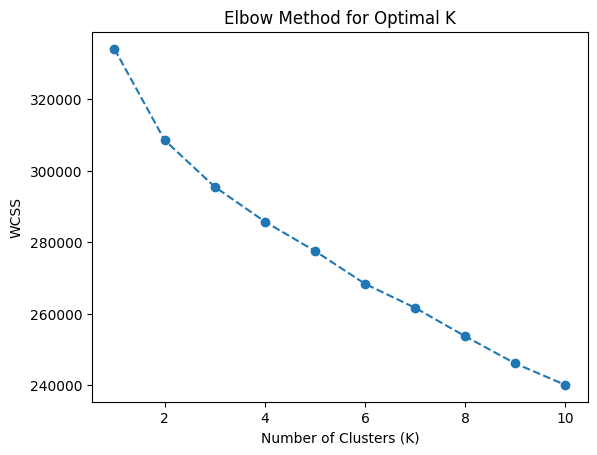

In [ ]:
# try elbow method

wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=2, random_state=42)
# df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:
# df_scaled.head(10)

In [ ]:
# pca = PCA(n_components=3)
# pca.fit(df_scaled)

# PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
# PCA_ds.describe().T

pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,11933.0,8.574386e-17,1.822284,-10.370425,-0.920375,-0.362208,1.009617,11.733803
col2,11933.0,3.572661e-18,1.368543,-11.234912,-0.802765,-0.088192,0.846862,5.266486


In [ ]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

# PC3_explainedvariance = explained_variance[2]
# print("Explained variance of PC3", PC3_explainedvariance)

Explained variance of PC1 0.1185872265127271
Explained variance of PC2 0.0668840335854003


In [ ]:
# loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.columns)
# loading_matrix

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_scaled.columns)
loading_matrix

,PC1,PC2
Education,-0.157989,0.565462
FamilyIncomeRatio,0.051477,0.613459
Housing,-0.026244,0.459953
BMI,0.744288,0.086808
WaistCircumference,0.778720,0.112803
SystolicBP,0.493151,0.126809
DiastolicBP,0.507145,0.232923
TotalCholesterol,0.190841,0.310639
FastingBloodGlucose,0.431674,-0.398731
InsulinLevel,0.256481,-0.174032


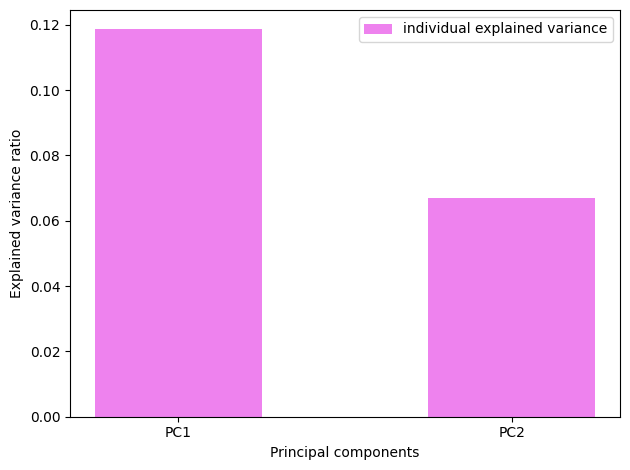

In [ ]:
plt.figure()
principalcomponents = ['PC1', 'PC2']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

# plt.figure()
# principalcomponents = ['PC1', 'PC2', 'PC3']

# plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.legend(loc='best')
# plt.tight_layout()

# plt.show()

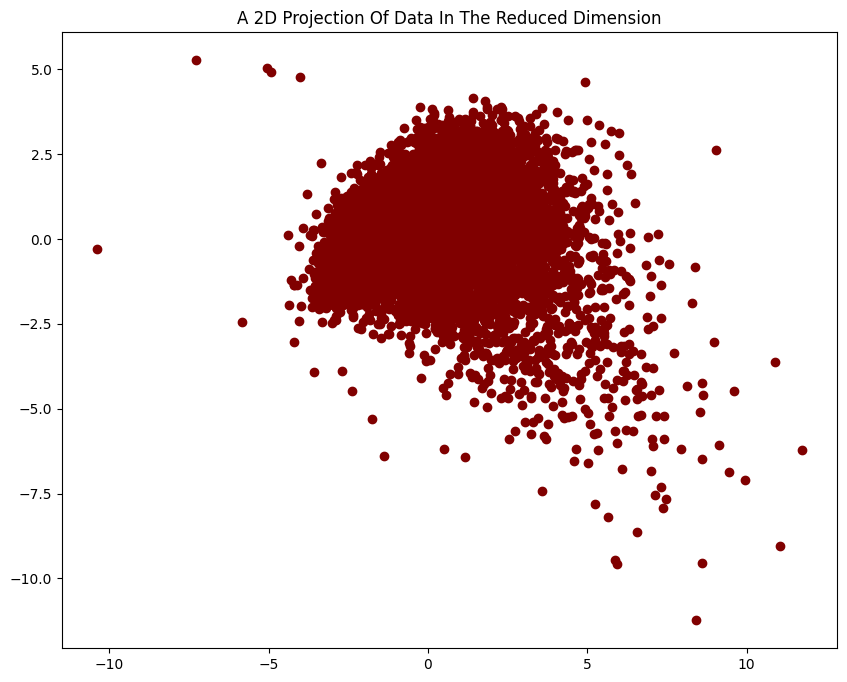

In [ ]:
# A 2D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

# #A 3D Projection Of Data In The Reduced Dimension
# x =PCA_ds["col1"]
# y =PCA_ds["col2"]
# z =PCA_ds["col3"]
# #To plot
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(x,y,z, c="maroon", marker="o" )
# ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
# plt.show()

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  11933 non-null  float64
 1   FamilyIncomeRatio          11933 non-null  float64
 2   Housing                    11933 non-null  float64
 3   BMI                        11933 non-null  float64
 4   WaistCircumference         11933 non-null  float64
 5   SystolicBP                 11933 non-null  float64
 6   DiastolicBP                11933 non-null  float64
 7   TotalCholesterol           11933 non-null  float64
 8   FastingBloodGlucose        11933 non-null  float64
 9   InsulinLevel               11933 non-null  float64
 10  CRP                        11933 non-null  float64
 11  Glycohemoglobin            11933 non-null  float64
 12  Ferritin                   11933 non-null  float64
 13  RBCFolate                  11933 non-null  flo

In [ ]:
# # get the silhouette score
# from sklearn.metrics import silhouette_score

# silhouette_score(df_scaled, df_scaled['cluster'])

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
y_kmeans = kmeans.fit(PCA_ds)
PCA_ds["Clusters"] = y_kmeans.labels_
df["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(PCA_ds, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 25722.044765318118
The average silhouette score is : 0.4648688151881229


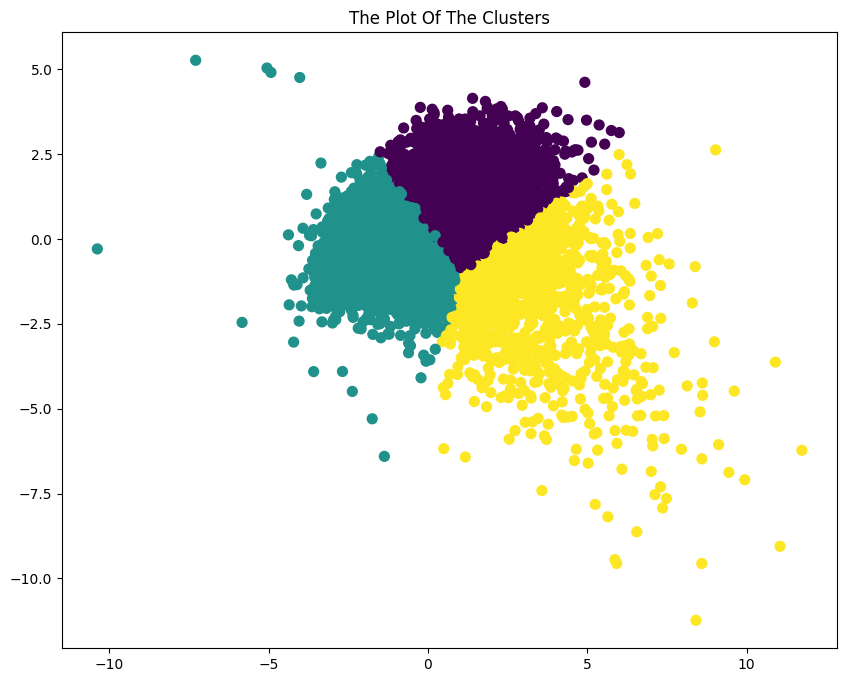

In [ ]:
# #Plotting the clusters
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label="bla")
# ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap='viridis')
# ax.set_title("The Plot Of The Clusters")
# plt.show()

# Plotting the clusters in 2D
plt.figure(figsize=(10,8))
plt.scatter(PCA_ds["col1"], PCA_ds["col2"], c=PCA_ds["Clusters"], s=50, cmap='viridis')
plt.title("The Plot Of The Clusters")
plt.show()

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


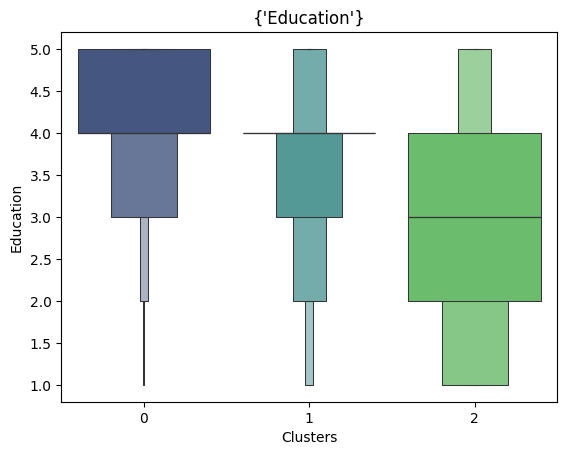

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


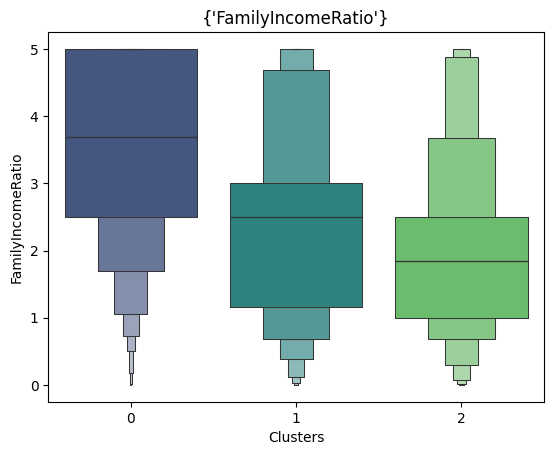

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


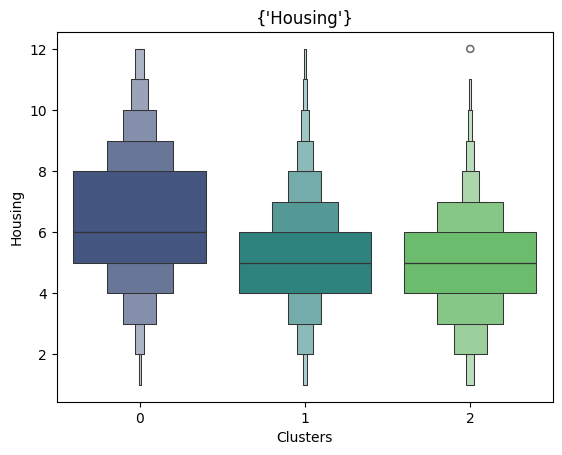

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


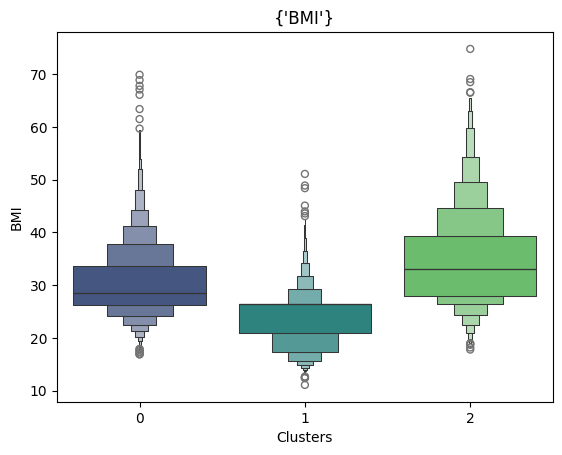

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


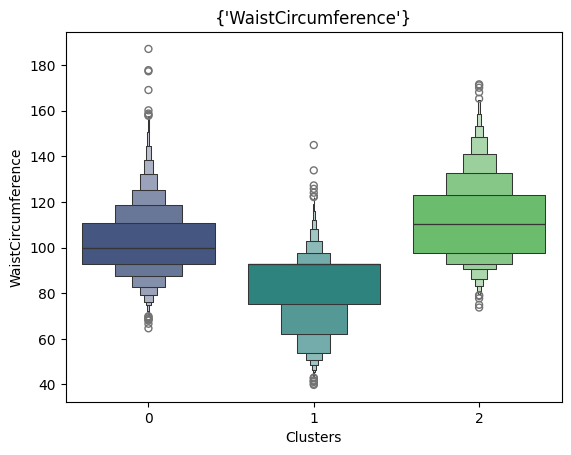

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


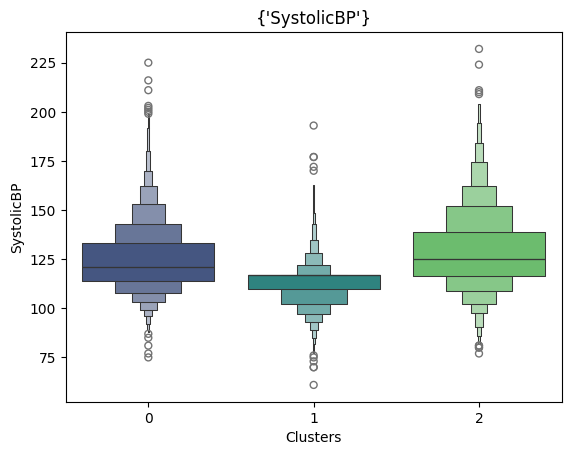

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


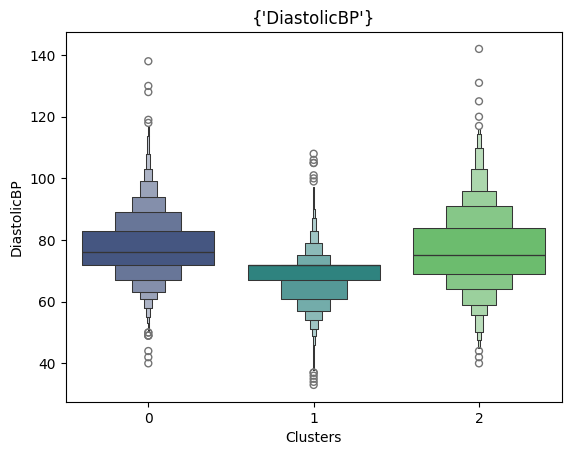

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


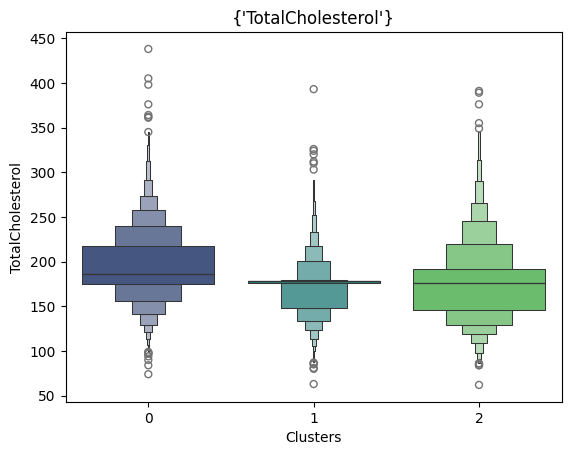

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


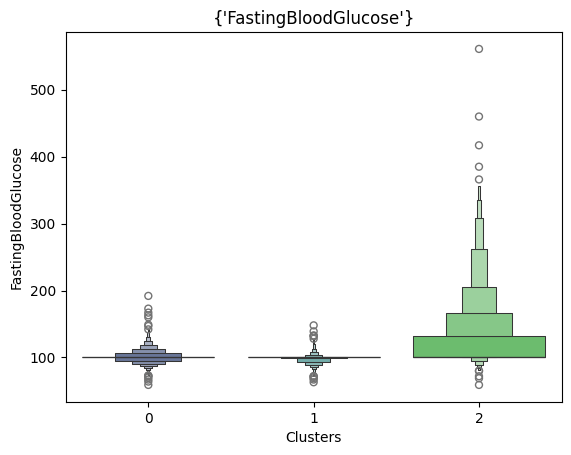

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


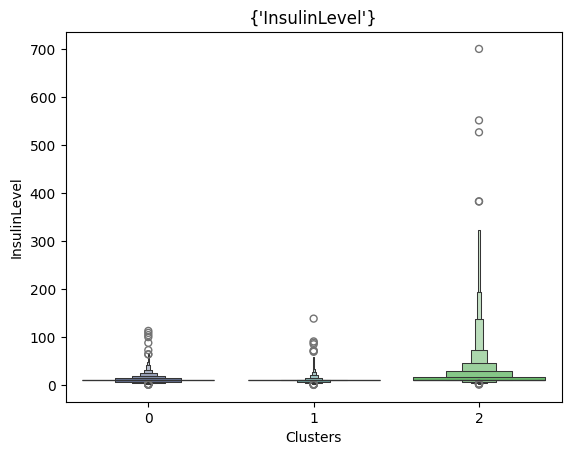

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


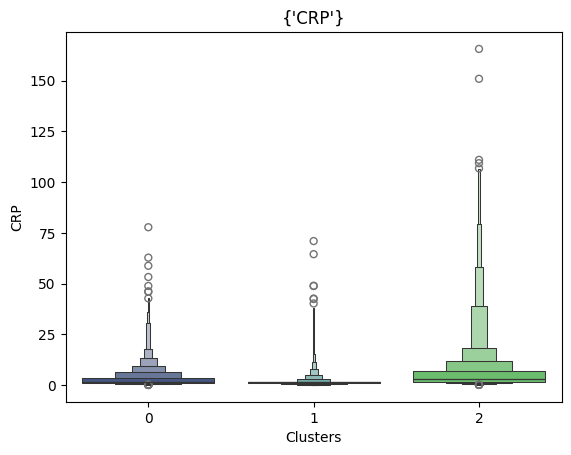

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


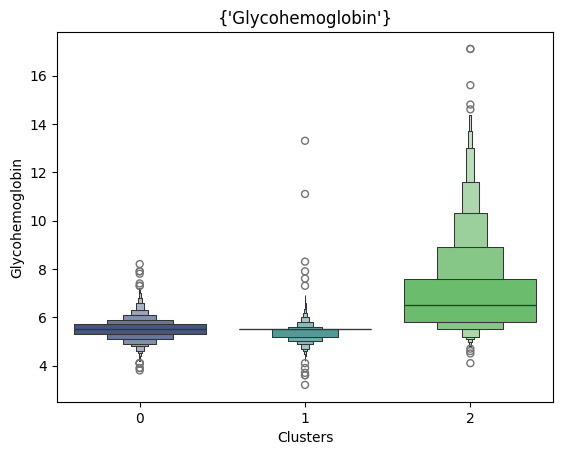

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


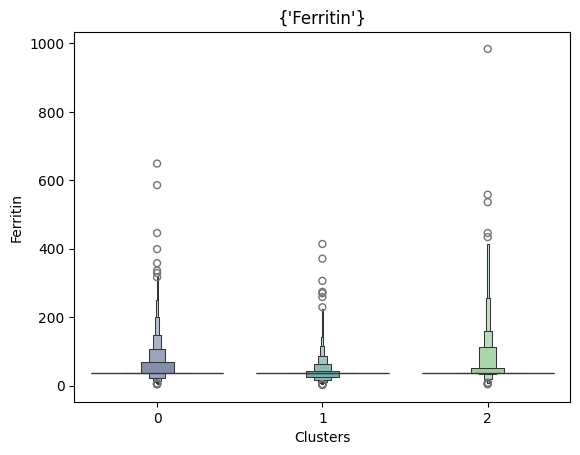

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


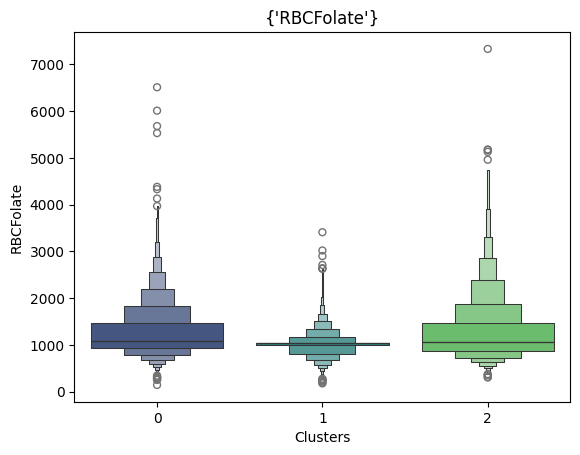

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


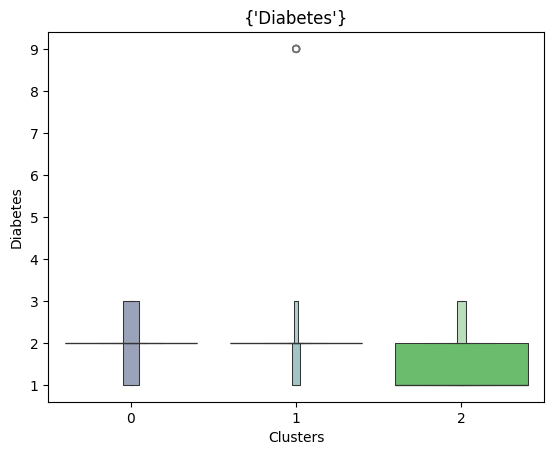

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


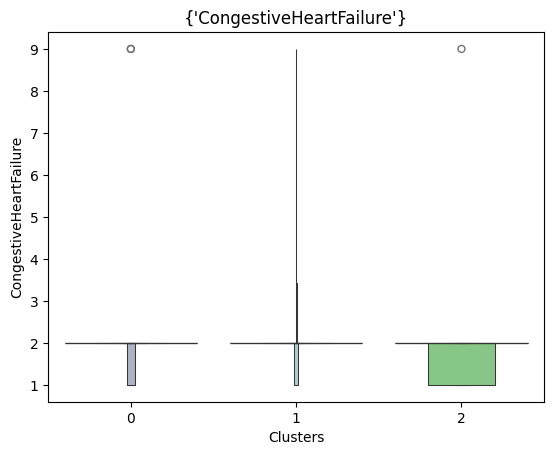

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


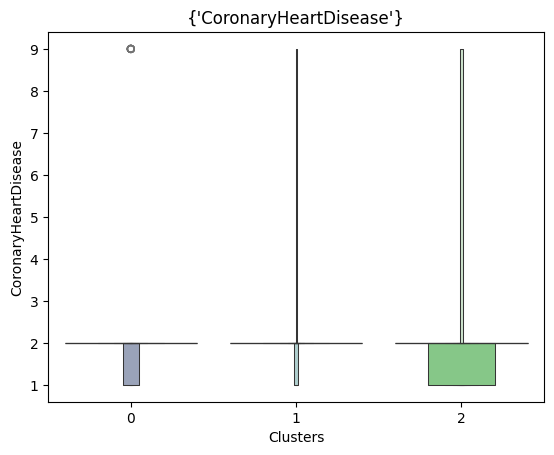

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


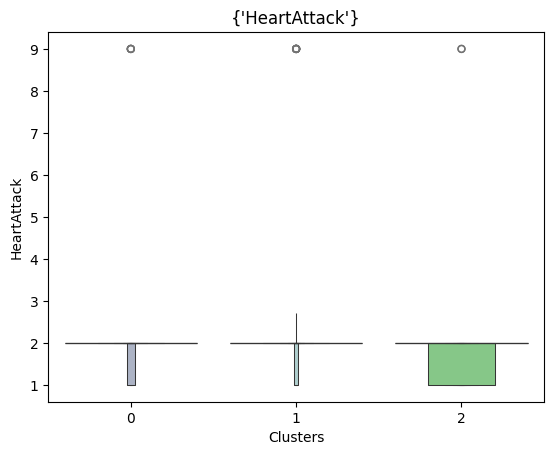

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


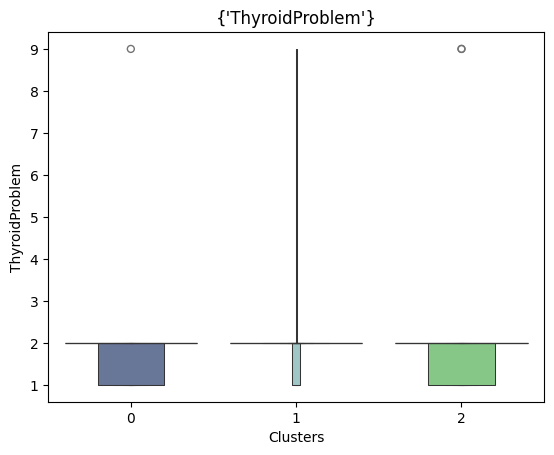

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


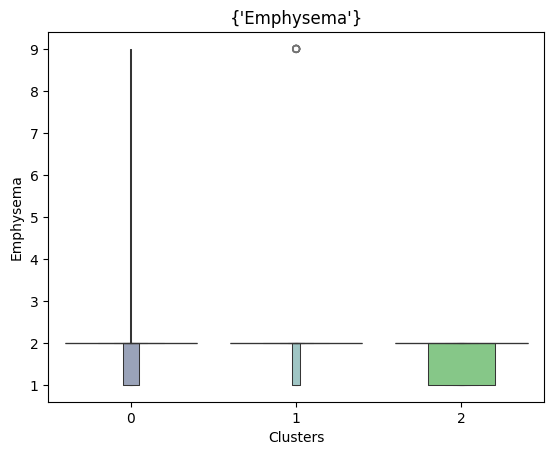

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


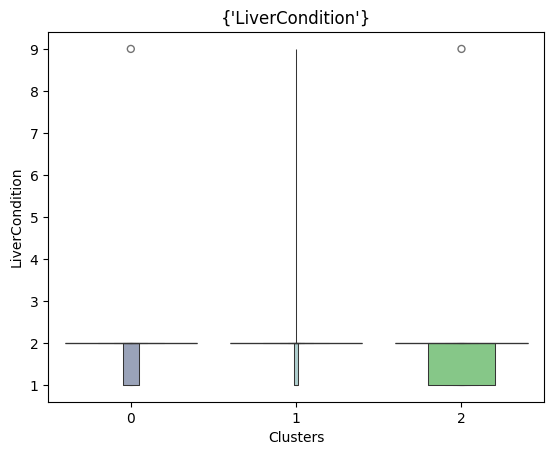

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


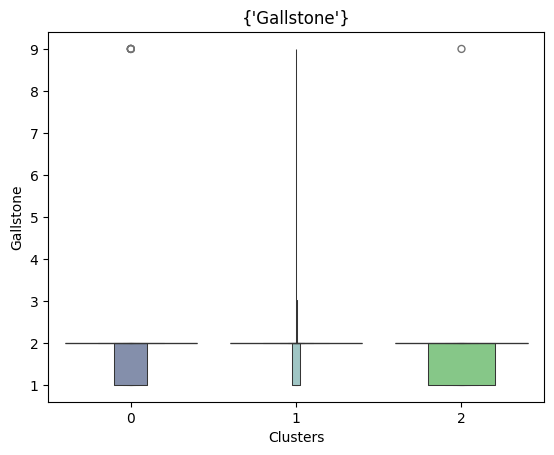

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


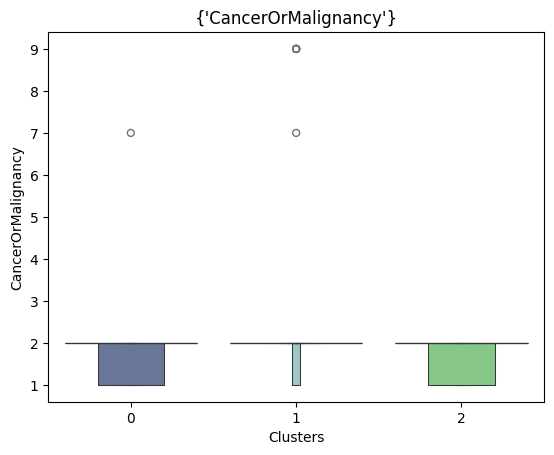

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


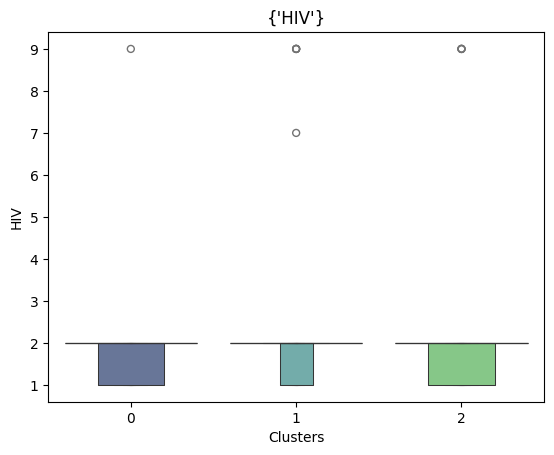

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


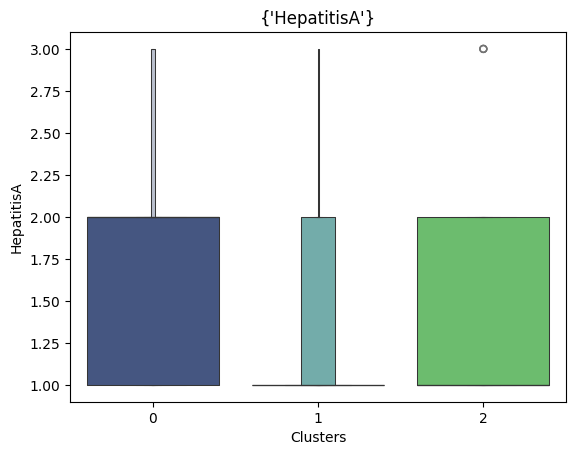

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


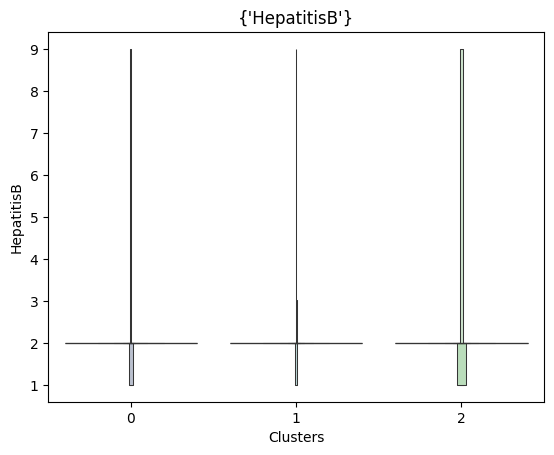

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


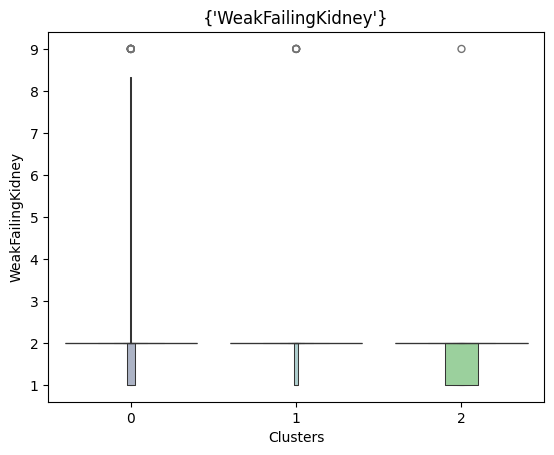

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


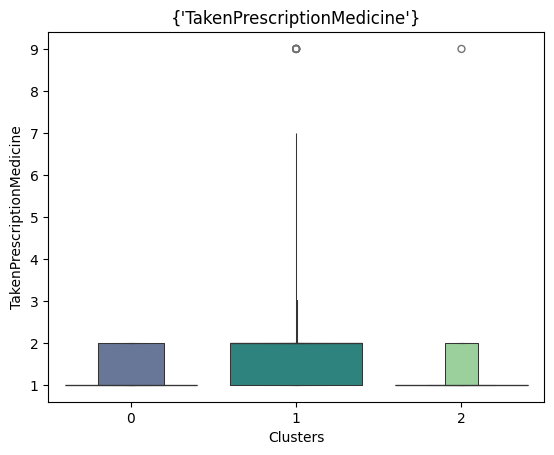

<ipython-input-101-c51af6de9fc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


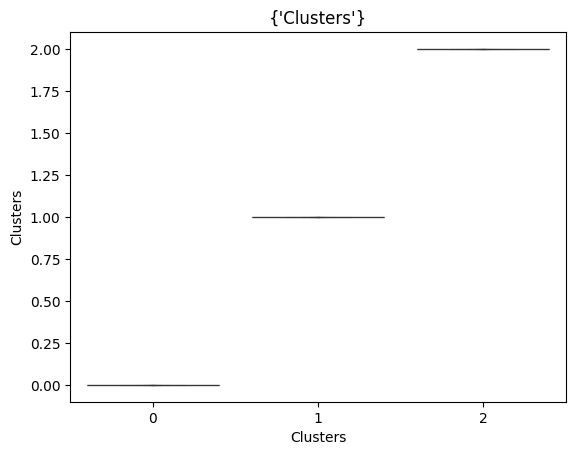

In [ ]:
for col in df.columns:

  plt.figure()
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")
  pl.set_title({col})
  plt.show()

# DB SCAN


In [ ]:
dbscan_df = df.copy()
dbscan_df.head()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(dbscan_df)

X_dbscan_face, X_test = train_test_split(dbscan_df, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_dbscan_face)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=dbscan_df.columns)

X_dbscan_face['cluster'] = kmeans.labels_

In [ ]:
dbscan_df = df.copy()
dbscan_df.head()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(dbscan_df)

X_dbscan_face, X_test = train_test_split(dbscan_df, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_dbscan_face)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=dbscan_df.columns)

X_dbscan_face['cluster'] = kmeans.labels_

In [ ]:
silhouette_score(X_dbscan_face, X_dbscan_face['cluster'])

0.7307751534523562

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Total variance captured by selected components
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [0.11858723 0.06688403]
Total Variance Explained: 0.1854712600981274


In [ ]:
selected_features = df.columns[: pca.components_.shape[1]]  # Adjust as needed
loadings = pd.DataFrame(
    pca.components_,
    columns=selected_features,
    index=[f'PCA{i+1}' for i in range(pca.n_components_)]
)


# Agglo


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Apply PCA to the standardized dataset
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [ ]:
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
df_pca_clusters = agglo.fit_predict(df_pca)

In [ ]:
# Add cluster labels to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_pca_clusters

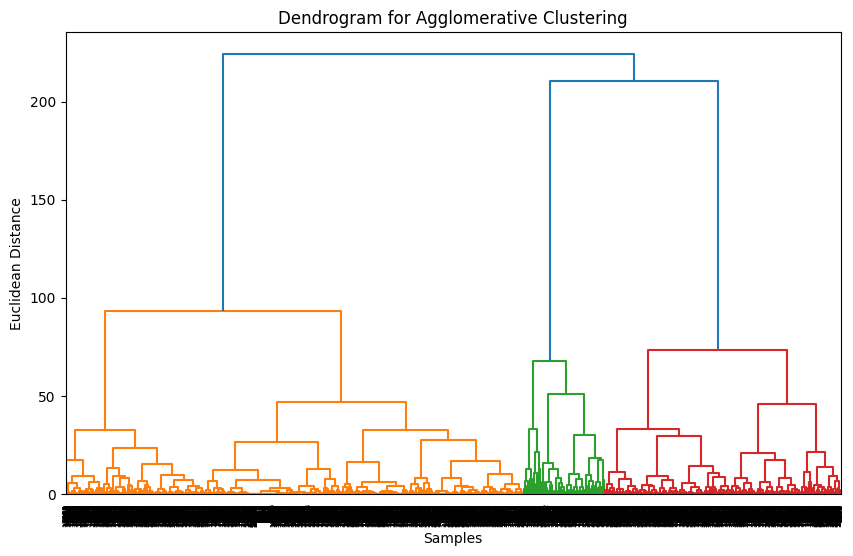

In [ ]:
# Plot Dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(df_pca[['PC1', 'PC2']], method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

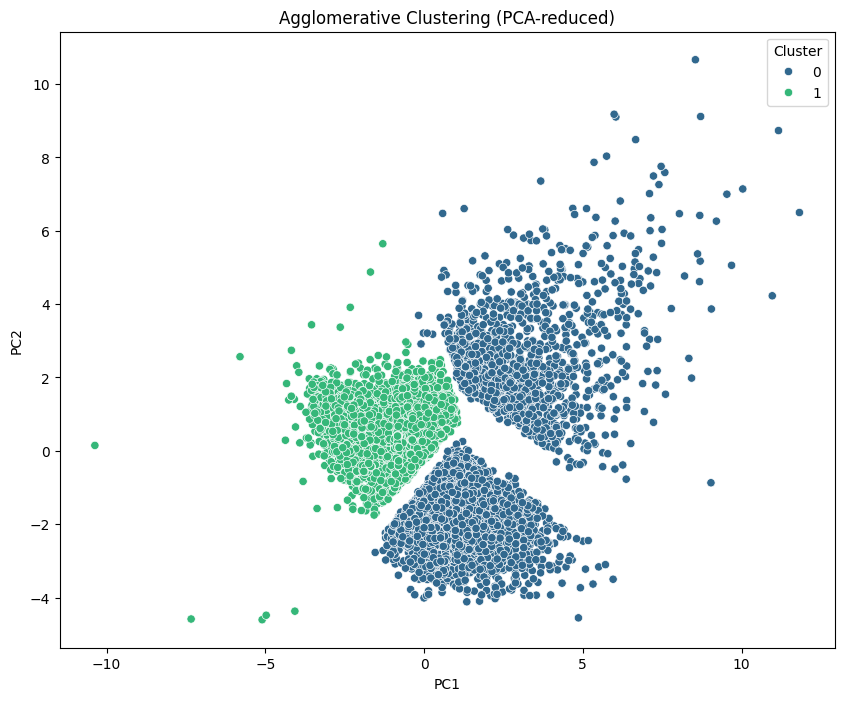

In [ ]:
# Scatter plot for clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis')
plt.title("Agglomerative Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4425980963846502


<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


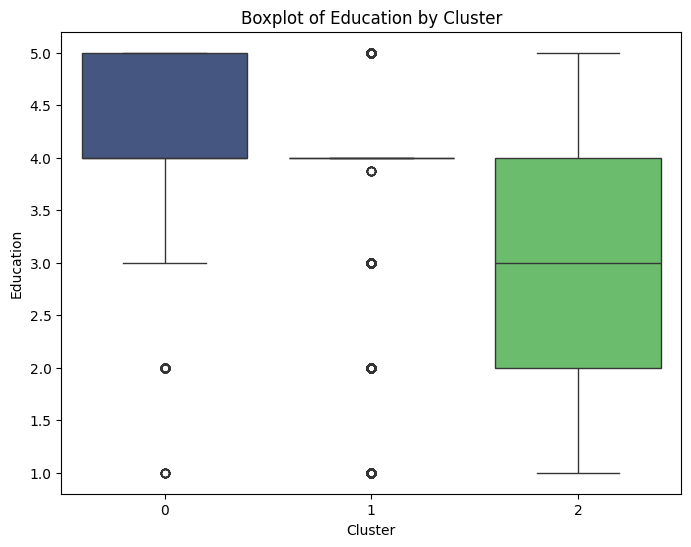

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


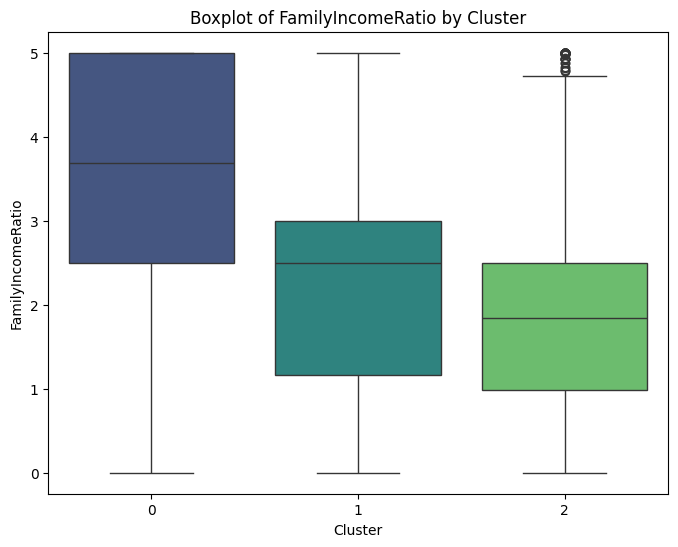

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


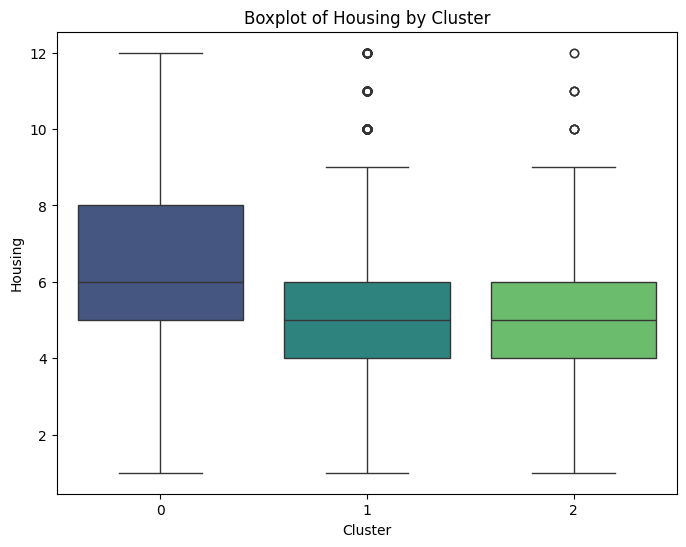

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


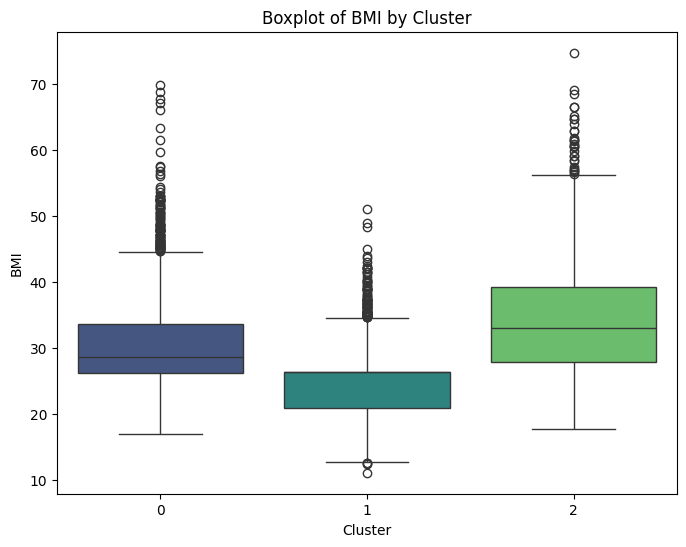

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


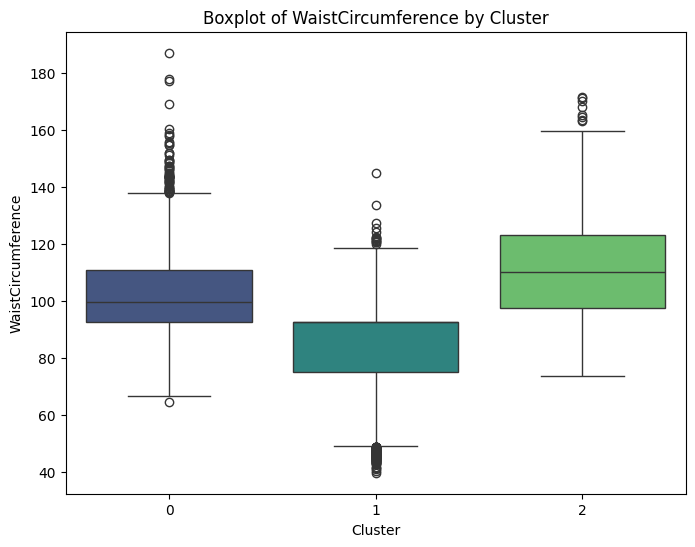

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


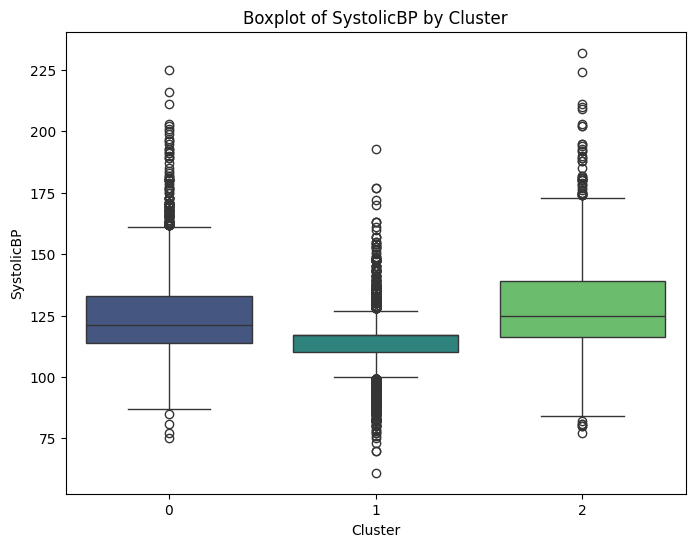

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


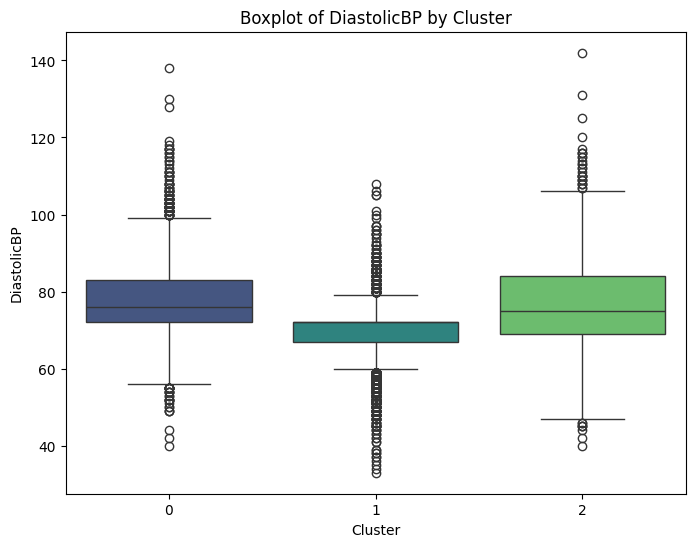

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


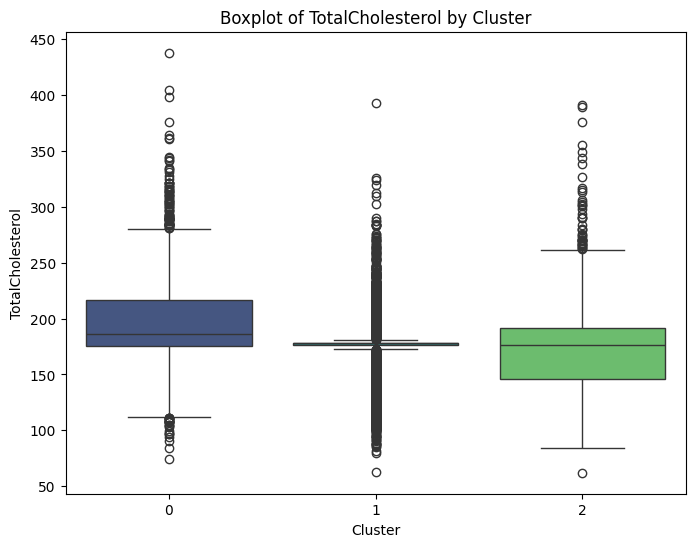

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


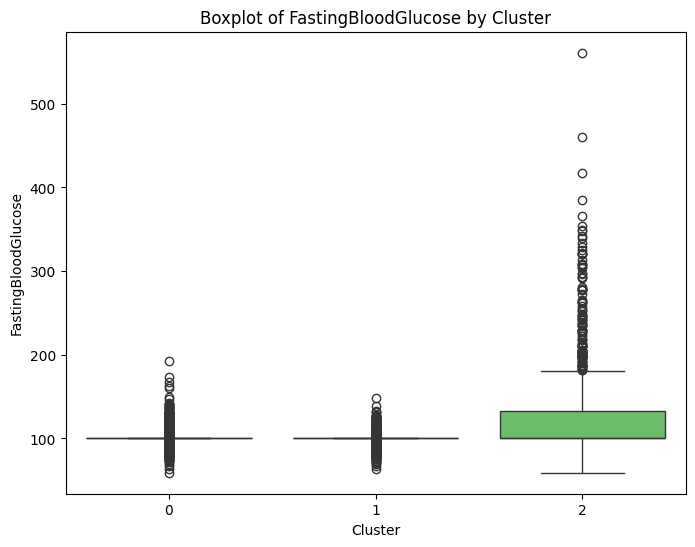

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


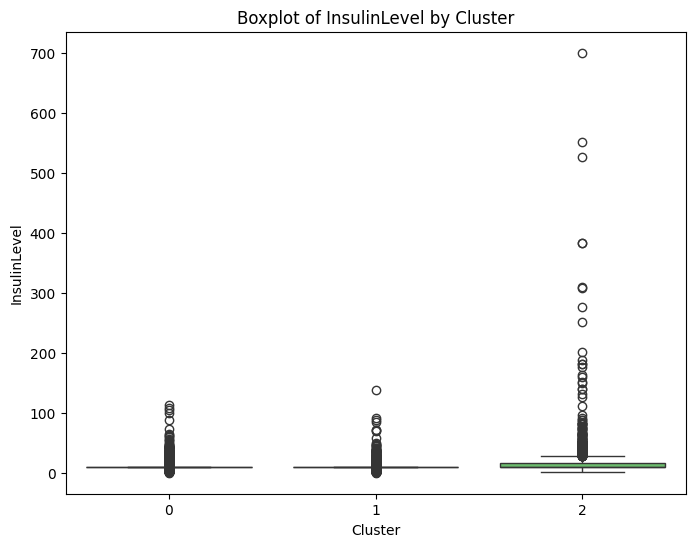

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


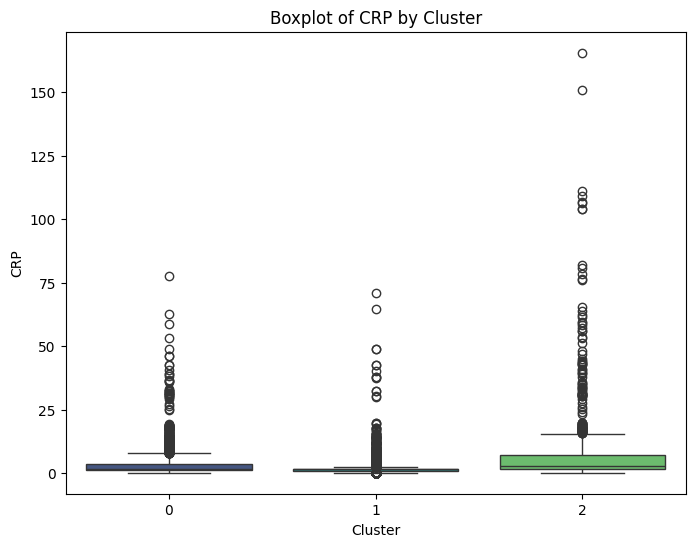

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


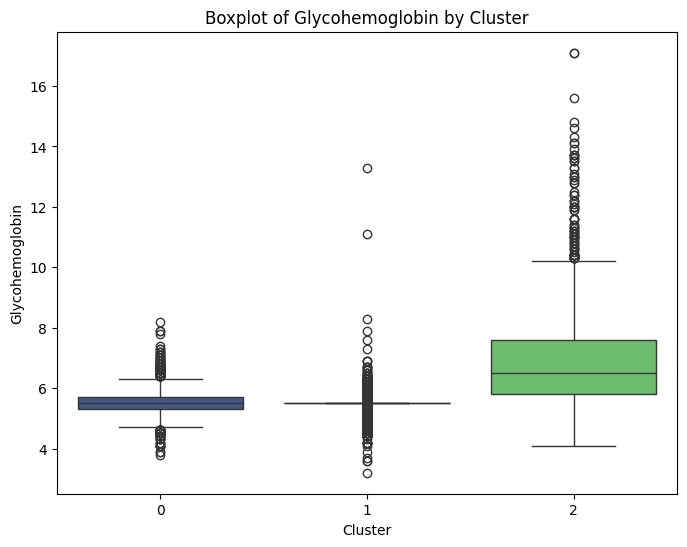

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


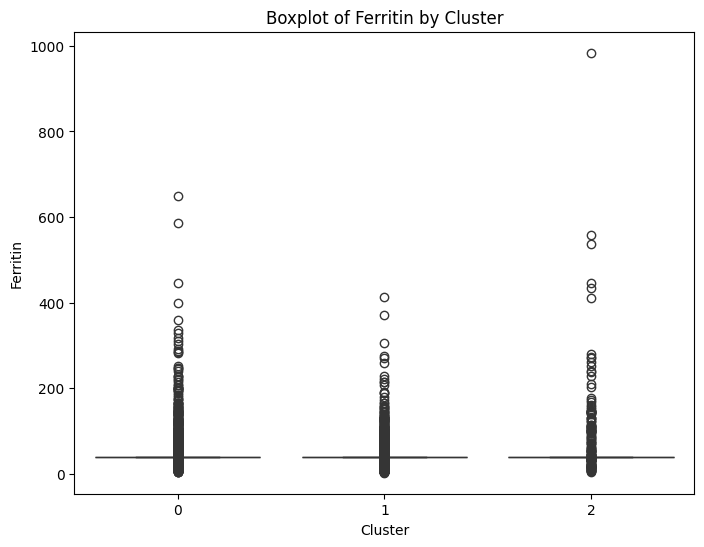

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


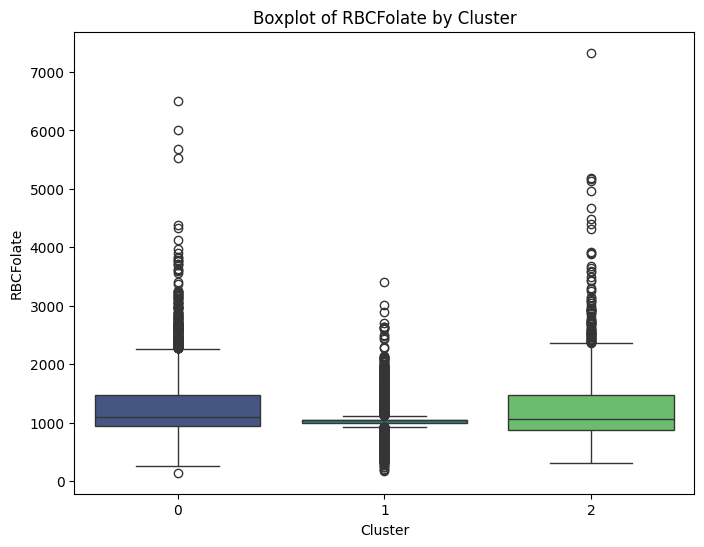

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


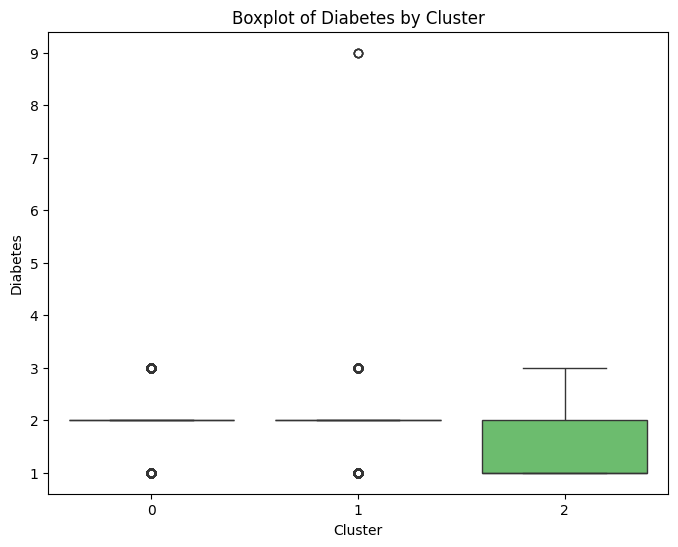

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


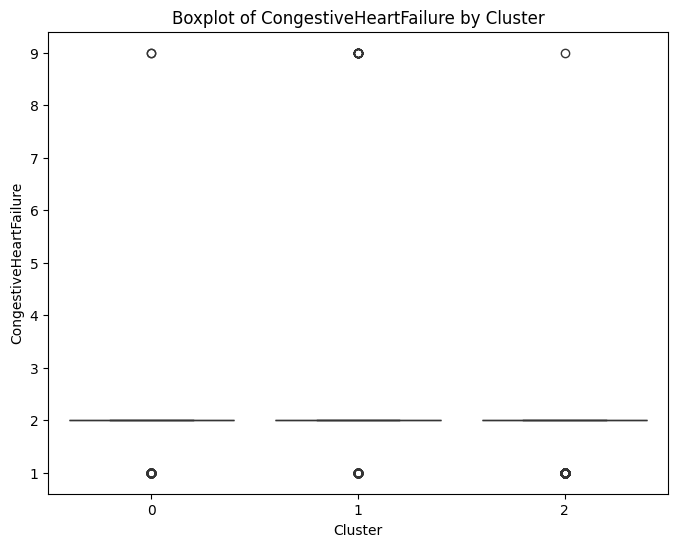

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


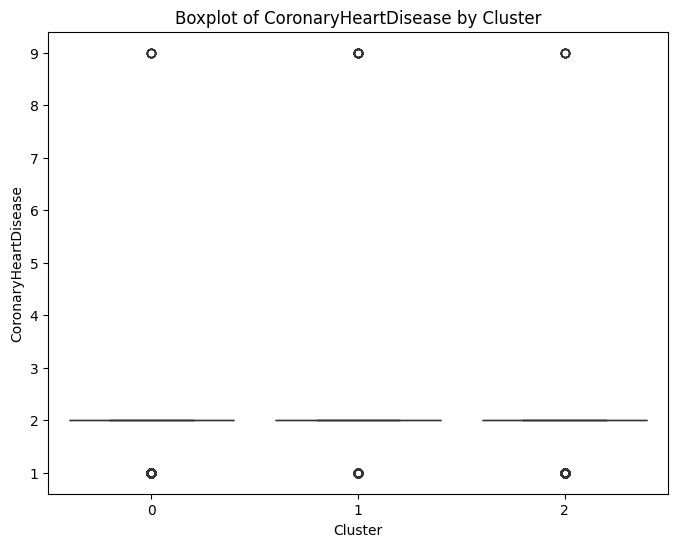

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


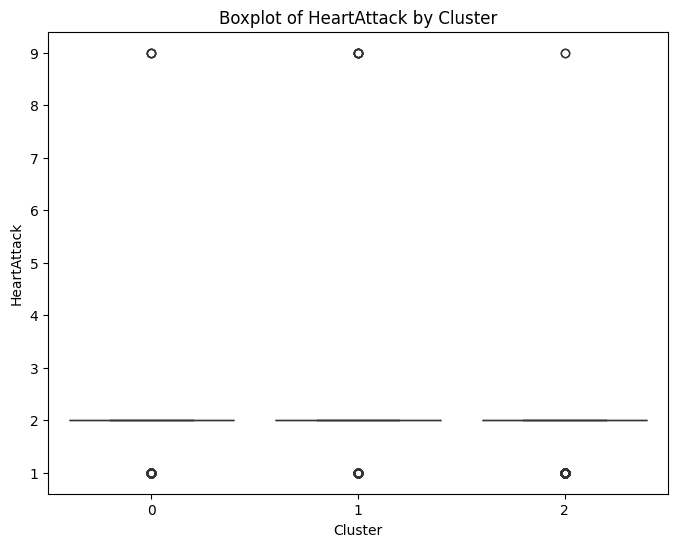

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


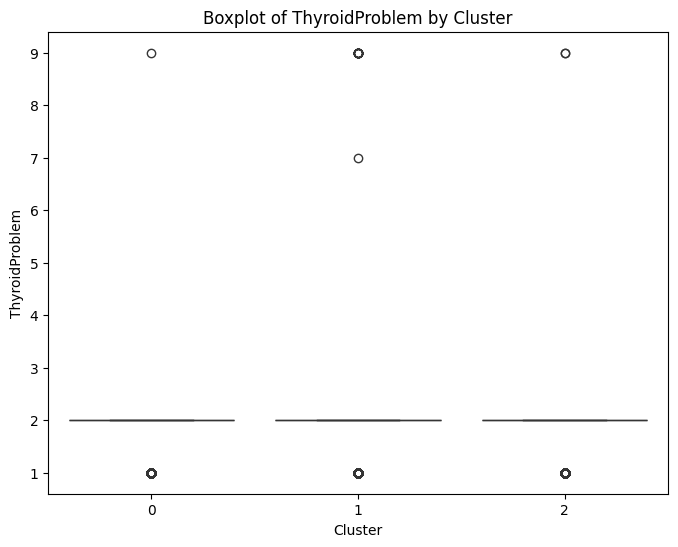

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


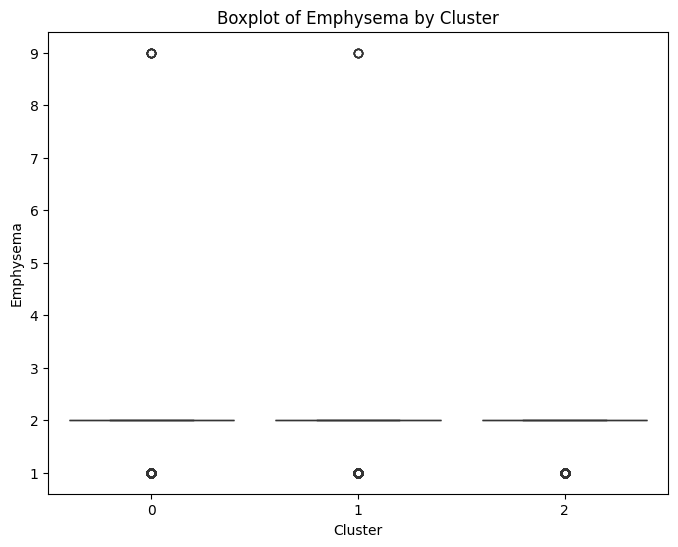

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


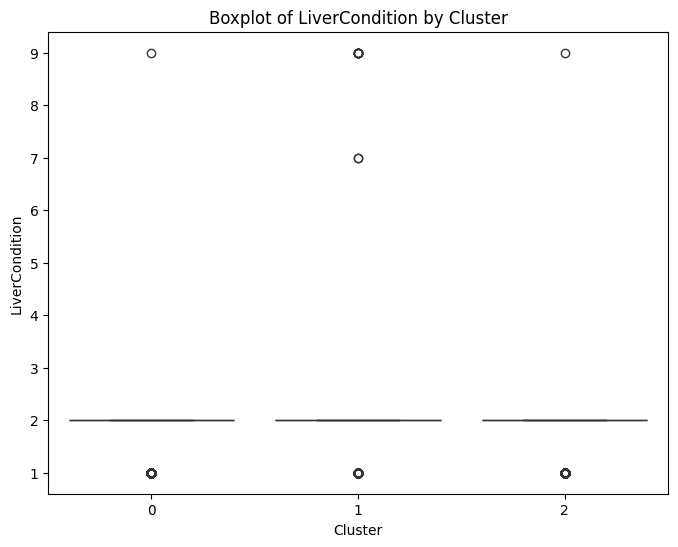

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


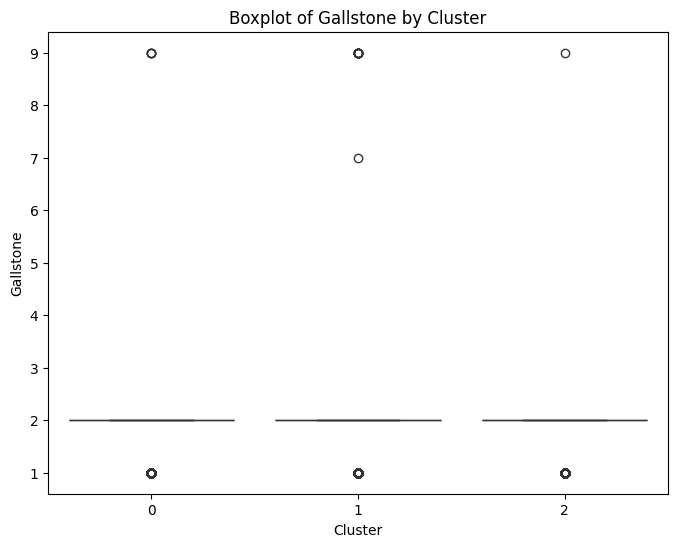

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


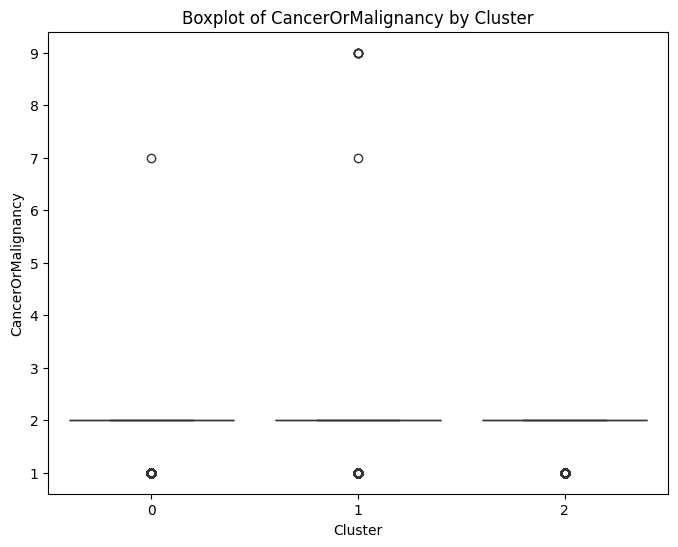

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


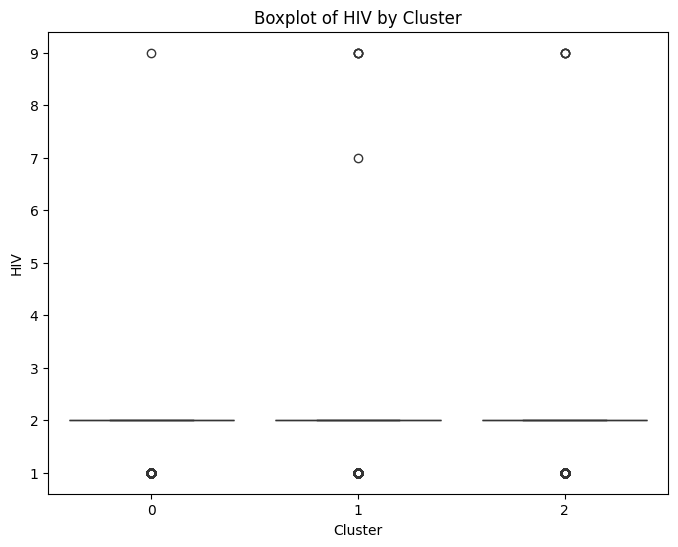

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


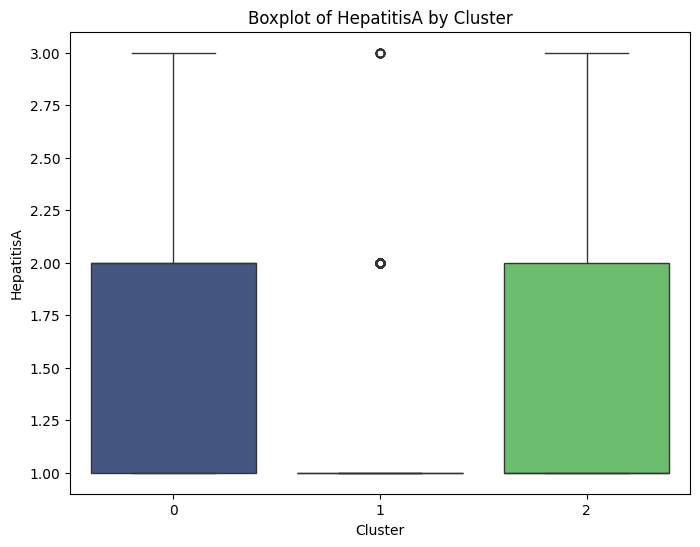

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


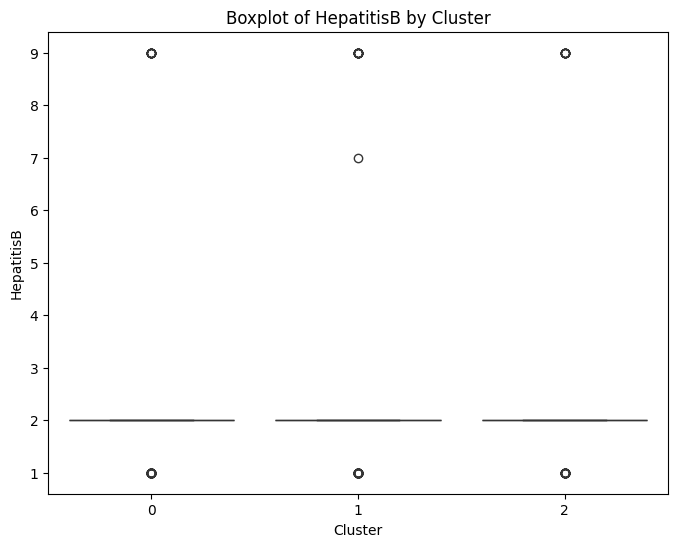

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


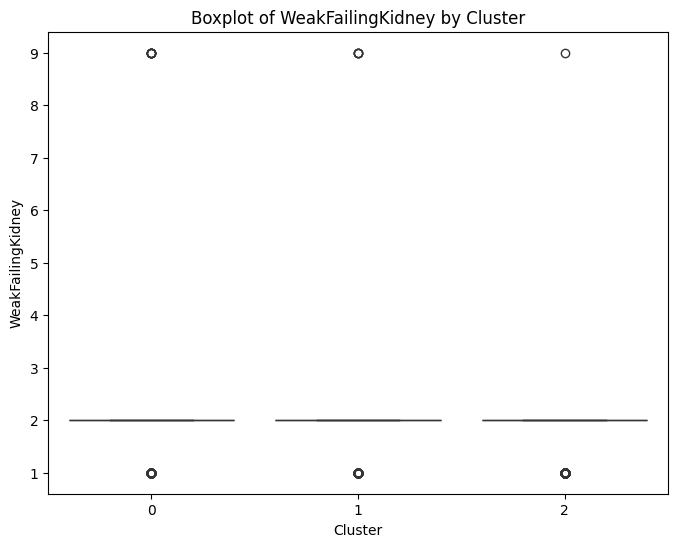

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


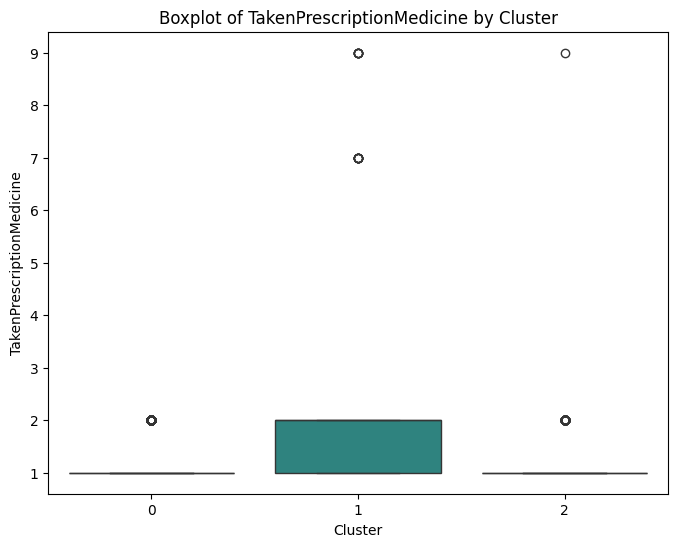

<ipython-input-118-b542a9fc5768>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")


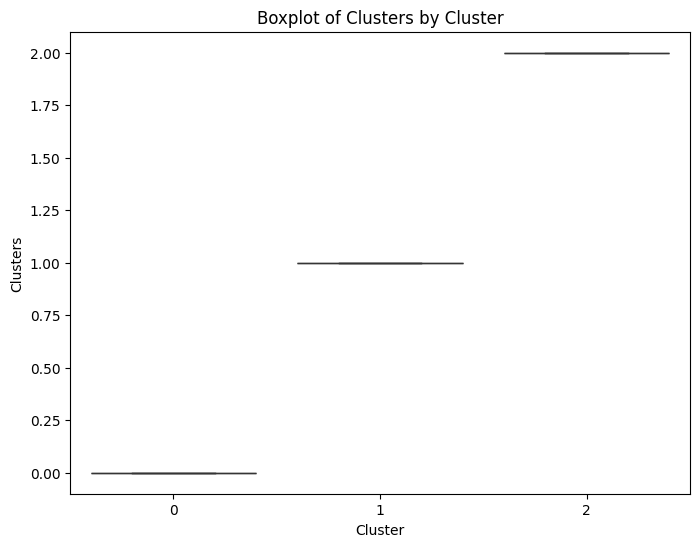

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through all columns except "Clusters" and create boxplots
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df["Clusters"], y=df[col], palette="viridis")
    plt.title(f"Boxplot of {col} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.show()
